In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import  LabelEncoder , Normalizer 
from sklearn.model_selection import  KFold
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score,
                             roc_auc_score, classification_report, 
                             precision_score, recall_score, matthews_corrcoef,
                             cohen_kappa_score, log_loss, precision_recall_curve,
                             RocCurveDisplay, PrecisionRecallDisplay , roc_curve)


import torch as T
import torch.nn as nn
import torch.optim as O
from torch.utils.data import DataLoader, TensorDataset

import tqdm 
import os

In [2]:
df = pd.read_csv("../csvs/Space/dataset.csv")

C:\Users\peter longnose\AppData\Local\Temp\ipykernel_55240\25404998.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../csvs/Space/dataset.csv")


In [3]:
df

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [5]:
df.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [6]:
df["pha"].unique()

array(['N', 'Y', nan], dtype=object)

In [7]:
null = df.isnull().sum().sort_values(ascending=False)
df = df.drop(["prefix" , "name", "albedo", "diameter_sigma", "diameter"] , axis = 1)

In [8]:
df

,id,spkid,full_name,pdes,neo,pha,H,orbit_id,epoch,epoch_mjd,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,N,N,3.400,JPL 47,2458600.5,58600,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,N,N,4.200,JPL 37,2459000.5,59000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,N,N,5.330,JPL 112,2459000.5,59000,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,N,N,3.000,JPL 35,2458600.5,58600,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,N,N,6.900,JPL 114,2459000.5,59000,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,N,N,17.135,JPL 5,2437203.5,37203,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,N,N,18.500,8,2459000.5,59000,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,Y,Y,20.400,17,2459000.5,59000,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,N,N,18.071,JPL 3,2441956.5,41956,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [9]:
null

prefix            958506
name              936460
albedo            823421
diameter_sigma    822443
diameter          822315
sigma_ad           19926
sigma_per          19926
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_n            19922
sigma_tp           19922
pha                19921
moid               19921
H                   6263
moid_ld              127
per                    4
ad                     4
neo                    4
rms                    2
ma                     1
per_y                  1
class                  0
id                     0
tp_cal                 0
equinox                0
full_name              0
pdes                   0
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
e                      0
tp                     0
a                      0
q                      0


In [10]:
df["sigma_ad"].dtype

si = SimpleImputer(strategy= "mean")
sio = SimpleImputer(strategy= "most_frequent")

df[["sigma_ad"]] = si.fit_transform(df[["sigma_ad"]])
df[["sigma_per"]] = si.fit_transform(df[["sigma_per"]])
df[["sigma_e"]] = si.fit_transform(df[["sigma_e"]])
df[["sigma_a"]] = si.fit_transform(df[["sigma_a"]])
df[["sigma_q"]] = si.fit_transform(df[["sigma_q"]])
df[["sigma_i"]] = si.fit_transform(df[["sigma_i"]])
df[["sigma_om"]] = si.fit_transform(df[["sigma_om"]])
df[["sigma_w"]] = si.fit_transform(df[["sigma_w"]])
df[["sigma_ma"]] = si.fit_transform(df[["sigma_ma"]])
df[["sigma_n"]] = si.fit_transform(df[["sigma_n"]])
df[["sigma_tp"]] = si.fit_transform(df[["sigma_tp"]])
df[["pha"]] = sio.fit_transform(df[["pha"]])
df[["moid"]] = si.fit_transform(df[["moid"]])
df[["H"]] = si.fit_transform(df[["H"]])
df[["moid_ld"]] = si.fit_transform(df[["moid_ld"]])
df[["per"]] = si.fit_transform(df[["per"]])
df[["ad"]] = si.fit_transform(df[["ad"]])
df[["neo"]] = sio.fit_transform(df[["neo"]])
df[["rms"]] = si.fit_transform(df[["rms"]])
df[["ma"]] = si.fit_transform(df[["ma"]])
df[["per_y"]] = si.fit_transform(df[["per_y"]])

In [11]:
df

,id,spkid,full_name,pdes,neo,pha,H,orbit_id,epoch,epoch_mjd,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,N,N,3.400,JPL 47,2458600.5,58600,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,N,N,4.200,JPL 37,2459000.5,59000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,N,N,5.330,JPL 112,2459000.5,59000,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,N,N,3.000,JPL 35,2458600.5,58600,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,N,N,6.900,JPL 114,2459000.5,59000,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,N,N,17.135,JPL 5,2437203.5,37203,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,N,N,18.500,8,2459000.5,59000,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,Y,Y,20.400,17,2459000.5,59000,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,N,N,18.071,JPL 3,2441956.5,41956,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [12]:
df.isnull().sum().sort_values(ascending=False)

id           0
spkid        0
tp_cal       0
per          0
per_y        0
moid         0
moid_ld      0
sigma_e      0
sigma_a      0
sigma_q      0
sigma_i      0
sigma_om     0
sigma_w      0
sigma_ma     0
sigma_ad     0
sigma_n      0
sigma_tp     0
sigma_per    0
class        0
tp           0
n            0
ad           0
epoch_mjd    0
full_name    0
pdes         0
neo          0
pha          0
H            0
orbit_id     0
epoch        0
epoch_cal    0
ma           0
equinox      0
e            0
a            0
q            0
i            0
om           0
w            0
rms          0
dtype: int64

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
df

,id,spkid,full_name,pdes,neo,pha,H,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,N,N,3.400,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.594780,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,N,N,4.200,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.234290,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,N,N,5.330,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.034290,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,N,N,3.000,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.139480,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,N,N,6.900,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.095750,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,N,N,17.135,JPL 5,2437203.5,37203,19600926.0,J2000,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,342.057565,2.704916,0.286125,2.437266e+06,1.960113e+07,1258.191614,3.444741,0.861979,335.456367,2.142200e-02,8.779900e-01,7.299800e-01,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,N,N,18.500,8,2459000.5,59000,20200531.0,J2000,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,260.113042,2.995502,0.276248,2.459362e+06,2.021053e+07,1303.177916,3.567907,0.671242,261.227249,2.642000e-07,1.885500e-08,6.256300e-07,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,Y,Y,20.400,17,2459000.5,59000,20200531.0,J2000,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,240.473601,4.683363,0.208444,2.459574e+06,2.021123e+07,1727.085364,4.728502,0.035589,13.850093,6.636800e-08,9.925600e-08,1.687100e-07,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,N,N,18.071,JPL 3,2441956.5,41956,19731001.0,J2000,0.202053,2.373137,1.893638,0.732484,176.499082,198.026527,355.351127,2.852636,0.269600,2.441974e+06,1.973102e+07,1335.311579,3.655884,0.893896,347.877506,3.169800e-02,5.966200e-01,5.478400e-01,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [15]:
le = LabelEncoder()
df["pha"] = le.fit_transform(df["pha"])
df["neo"] = le.fit_transform(df["neo"])
df["orbit_id"] = le.fit_transform(df["orbit_id"])
df["full_name"] = le.fit_transform(df["full_name"])
df["id"] = le.fit_transform(df["id"])
df["equinox"] = le.fit_transform(df["equinox"])
df["class"] = le.fit_transform(df["class"])

df["pdes"] = df["pdes"].astype(str)
df["pdes"] = le.fit_transform(df["pdes"])


In [16]:
df

,id,spkid,full_name,pdes,neo,pha,H,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,0,2000001,413389,0,0,0,3.400,517,2458600.5,58600,20190427.0,0,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.594780,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,8,0.43301
1,1,2000002,413390,113927,0,0,4.200,494,2459000.5,59000,20200531.0,0,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.234290,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,8,0.35936
2,2,2000003,413391,635604,0,0,5.330,323,2459000.5,59000,20200531.0,0,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.034290,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,8,0.33848
3,3,2000004,413392,746715,0,0,3.000,489,2458600.5,58600,20190427.0,0,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.139480,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,8,0.39980
4,4,2000005,413393,857830,0,0,6.900,325,2459000.5,59000,20200531.0,0,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.095750,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,8,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,958519,3246801,413369,914225,0,0,17.135,524,2437203.5,37203,19600926.0,0,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,342.057565,2.704916,0.286125,2.437266e+06,1.960113e+07,1258.191614,3.444741,0.861979,335.456367,2.142200e-02,8.779900e-01,7.299800e-01,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,8,0.23839
958520,958520,3246834,413370,917759,0,0,18.500,224,2459000.5,59000,20200531.0,0,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,260.113042,2.995502,0.276248,2.459362e+06,2.021053e+07,1303.177916,3.567907,0.671242,261.227249,2.642000e-07,1.885500e-08,6.256300e-07,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,8,0.53633
958521,958521,3013075,413371,917904,1,1,20.400,72,2459000.5,59000,20200531.0,0,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,240.473601,4.683363,0.208444,2.459574e+06,2.021123e+07,1727.085364,4.728502,0.035589,13.850093,6.636800e-08,9.925600e-08,1.687100e-07,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,1,0.51556
958522,958522,3246457,413362,531160,0,0,18.071,470,2441956.5,41956,19731001.0,0,0.202053,2.373137,1.893638,0.732484,176.499082,198.026527,355.351127,2.852636,0.269600,2.441974e+06,1.973102e+07,1335.311579,3.655884,0.893896,347.877506,3.169800e-02,5.966200e-01,5.478400e-01,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,8,0.25641


In [17]:
df.dtypes

id             int32
spkid          int64
full_name      int32
pdes           int32
neo            int32
pha            int32
H            float64
orbit_id       int32
epoch        float64
epoch_mjd      int64
epoch_cal    float64
equinox        int32
e            float64
a            float64
q            float64
i            float64
om           float64
w            float64
ma           float64
ad           float64
n            float64
tp           float64
tp_cal       float64
per          float64
per_y        float64
moid         float64
moid_ld      float64
sigma_e      float64
sigma_a      float64
sigma_q      float64
sigma_i      float64
sigma_om     float64
sigma_w      float64
sigma_ma     float64
sigma_ad     float64
sigma_n      float64
sigma_tp     float64
sigma_per    float64
class          int32
rms          float64
dtype: object

In [18]:
X = df.drop(["pha"], axis = 1).values
print(X.shape)
X = X.astype(np.float32)
X

(958524, 39)


array([[0.000000e+00, 2.000001e+06, 4.133890e+05, ..., 9.415900e-09,
        8.000000e+00, 4.330100e-01],
       [1.000000e+00, 2.000002e+06, 4.133900e+05, ..., 3.680700e-06,
        8.000000e+00, 3.593600e-01],
       [2.000000e+00, 2.000003e+06, 4.133910e+05, ..., 3.107200e-06,
        8.000000e+00, 3.384800e-01],
       ...,
       [9.585210e+05, 3.013075e+06, 4.133710e+05, ..., 9.127500e-05,
        1.000000e+00, 5.155600e-01],
       [9.585220e+05, 3.246457e+06, 4.133620e+05, ..., 5.035500e+02,
        8.000000e+00, 2.564100e-01],
       [9.585230e+05, 3.246553e+06, 4.133640e+05, ..., 1.064800e+02,
        8.000000e+00, 2.698000e-01]], dtype=float32)

In [19]:
y = df["pha"].values.reshape(-1,1)
print(y.shape)
y = y.astype(np.float32)
y

(958524, 1)


array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [20]:
fold = KFold(n_splits=10 , shuffle=True)
for train , test in fold.split(X , y):
    X_train , X_test = X[train] , X[test]
    y_train , y_test = y[train], y[test]

In [21]:
# Vor Skalierung
print("Vor der Skalierung:")
print(f"Trainingsdaten - Min: {X_train.min()}, Max: {X_train.max()}")
print(f"Testdaten - Min: {X_test.min()}, Max: {X_test.max()}")

Vor der Skalierung:
Trainingsdaten - Min: -14702.4482421875, Max: 285310013407232.0
Testdaten - Min: -70.70367431640625, Max: 1857899986944.0


In [22]:
sc = Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
# Vor Skalierung
print("Vor der Skalierung:")
print(f"Trainingsdaten - Min: {X_train.min()}, Max: {X_train.max()}")
print(f"Testdaten - Min: {X_test.min()}, Max: {X_test.max()}")

Vor der Skalierung:
Trainingsdaten - Min: -0.0005063371500000358, Max: 0.9999904632568359
Testdaten - Min: -2.4430275971099036e-06, Max: 0.9999906420707703


In [24]:
unique , counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique , counts)))

{0.0: 95648, 1.0: 204}


In [25]:
smote = SMOTE()
X_train , y_train = smote.fit_resample(X_train , y_train)

i:\Sonstiges\Programmieren\Machine Learning\.venv\Lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [26]:
unique , counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique , counts)))

{0.0: 95648, 1.0: 204}


In [27]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [28]:
X_train = T.from_numpy(X_train)
X_test = T.from_numpy(X_test)
y_train = T.from_numpy(y_train)
y_test = T.from_numpy(y_test)

In [29]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [30]:
class NN(nn.Module):

    def __init__(self, in_dim = X_train.shape[1] , out_dim = 1):
        super().__init__()
        self.ll1 = nn.Linear(in_dim , 5)
        self.ll2 = nn.Linear(5 , 5 )

        self.ll3 = nn.Linear(5 , 8)
        self.ll4 = nn.Linear(8 , out_dim)

        self.drop = nn.Dropout(p = (0.3))
        self.activation = nn.PReLU()

    def forward(self , X):

        X = self.activation(self.ll1(X))
        X = self.activation(self.ll2(X))
        X = self.drop(X)
        X = self.activation(self.ll3(X))
        X = self.drop(X)
        X = self.ll4(X)

        return X

class training():

    def __init__(self):
        self.device = T.device("cuda:0" if T.cuda.is_available() else "cpu")
        self.model = NN().to(self.device)
        self.epochs = 2
        self.lr = 1e-3
        self.momentum = 0.9
        self.crit = O.SGD(self.model.parameters() , lr = self.lr, weight_decay= 1e-3)
        self.crit2 = O.Adam(self.model.parameters() , self.lr , weight_decay= 1e-4)
        self.loss = nn.BCEWithLogitsLoss(pos_weight=T.tensor([1.0, 50.0]))

        self.X_train = X_train.float()
        self.X_test = X_test.float()
        self.y_train = y_train.float()
        self.y_test = y_test.float()

        self.batch_size = 64

        self.train_loader = DataLoader(dataset= TensorDataset(self.X_train , self.y_train),
                                       shuffle=True,
                                       batch_size=self.batch_size ,
                                       num_workers= os.cpu_count())
        
        self.test_loader = DataLoader(dataset= TensorDataset(self.X_test , self.y_test),
                               batch_size=self.batch_size ,
                               num_workers= os.cpu_count())
        
    def train_loop(self):

        for i in range(self.epochs):
            self.model.train()
            current_loss = 0.0
            with tqdm.tqdm(iterable=self.train_loader , mininterval=0.1 , disable=False) as pbar:
                for X , y in pbar:
                    X ,y = X.to(self.device) , y.to(self.device)
                    pbar.set_description(f"epoch : {i + 1}")
                    logits = self.model(X)
                    loss = self.loss(logits , y.reshape(-1,1))
                    self.crit2.zero_grad()
                    loss.backward()
                    self.crit2.step()

                    current_loss += loss.item()
                    pbar.set_postfix({"loss on current batch" : loss.item()})

            print(f"Epoch {i + 1}/{self.epochs} - Loss Overall: {current_loss / len(self.train_loader):.4f}") 

    def evaluate_model(self):
        self.model.eval()  # Setze das Modell in den Evaluierungsmodus
    
        # Variablen zur Speicherung der Vorhersagen und wahren Labels
        all_predictions = []
        all_labels = []
        all_probs = []
    
        with T.no_grad():  # Keine Gradientenberechnung nötig
            for inputs, labels in self.test_loader:
                inputs, labels = inputs.to(self.device), labels.to(self.device)
    
                # Vorhersagen des Modells
                outputs = self.model(inputs)
                probabilities = T.sigmoid(outputs)  # Für Wahrscheinlichkeiten
                predictions = (probabilities > 0.5).float()  # binäre Vorhersagen
    
                # Speichere die Vorhersagen und Labels
                all_predictions.extend(predictions.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                all_probs.extend(probabilities.cpu().numpy())
    
        # Konvertiere Listen in Numpy Arrays
        all_predictions = np.array(all_predictions).flatten()
        all_labels = np.array(all_labels).flatten()
        all_probs = np.array(all_probs).flatten()  # Flatten, um sicherzustellen, dass es eine Dimension hat
    
        # Berechne die Metriken
        accuracy = accuracy_score(all_labels, all_predictions)
        confusion = confusion_matrix(all_labels, all_predictions)
        f1 = f1_score(all_labels, all_predictions, average='weighted')
        roc_auc = roc_auc_score(all_labels, all_probs)  # AUC für binäre Klassifikation
        precision = precision_score(all_labels, all_predictions, average='weighted', zero_division=0)
        recall = recall_score(all_labels, all_predictions, average='weighted')
        mcc = matthews_corrcoef(all_labels, all_predictions)
        cohen_kappa = cohen_kappa_score(all_labels, all_predictions)
        log_loss_value = log_loss(all_labels, all_probs)
    
        # Ausgabe der Metriken
        print("Evaluationsmetriken:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"MCC: {mcc:.4f}")
        print(f"Cohen Kappa: {cohen_kappa:.4f}")
        print(f"Log Loss: {log_loss_value:.4f}")
        print("Confusion Matrix:")
        print(confusion)
        print("\nClassification Report:")
        print(classification_report(all_labels, all_predictions))
    
        # ROC-Kurve und Precision-Recall-Diagramm
        fpr, tpr, _ = roc_curve(all_labels, all_probs)
        RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
        
        # Sicherstellen, dass all_probs die Wahrscheinlichkeiten für die positive Klasse sind
        PrecisionRecallDisplay.from_predictions(all_labels, all_probs)  # Verwende hier all_probs
    
        plt.show()


epoch : 1: 100%|██████████| 26901/26901 [02:50<00:00, 157.64it/s, loss on current batch=0.622]


Epoch 1/2 - Loss Overall: 0.6489


epoch : 2: 100%|██████████| 26901/26901 [02:48<00:00, 159.37it/s, loss on current batch=0.609]


Epoch 2/2 - Loss Overall: 0.6001
Evaluationsmetriken:
Accuracy: 0.9979
F1-Score: 0.9968
ROC AUC: 0.4652
Precision: 0.9957
Recall: 0.9979
MCC: 0.0000
Cohen Kappa: 0.0000
Log Loss: 0.6603
Confusion Matrix:
[[95648     0]
 [  204     0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     95648
         1.0       0.00      0.00      0.00       204

    accuracy                           1.00     95852
   macro avg       0.50      0.50      0.50     95852
weighted avg       1.00      1.00      1.00     95852



i:\Sonstiges\Programmieren\Machine Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
i:\Sonstiges\Programmieren\Machine Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
i:\Sonstiges\Programmieren\Machine Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

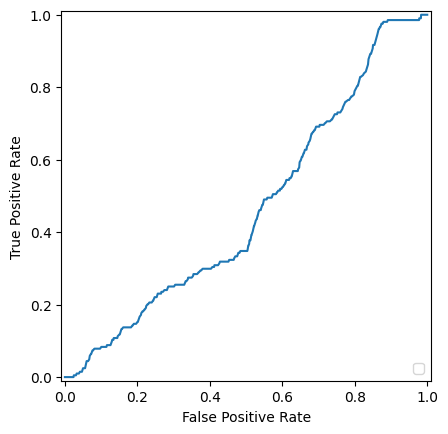

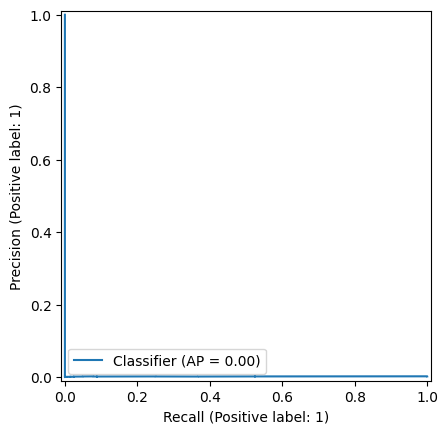

In [31]:
training().train_loop()
training().evaluate_model()